# 타이타닉 생존률 예측

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

> 이것은 전설적인 Titanic ML 대회입니다. ML 대회에 참여하고 Kaggle 플랫폼의 작동 방식을 익힐 수 있는 최고의 첫 번째 도전입니다.

> https://www.kaggle.com/competitions/titanic

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import sys
import os
work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from help_a.util import *
from help_a.plot import *
from help_a.analysis import *
from help_a.classification import *

### [2] 데이터 가져오기

| 변수 | 설명 | 라벨 |
|---|---|---|
| PassengerId | 일련번호 | |
| Survived | 생존여부 | `0`=사망, `1`=생존 |
| Pclass | 티켓등급 | `1` = 1등급, `2` = 2등급, `3` = 3등급 |
| Sex | 성별 | `male`=남자, `female`=여자 |
| Age | 나이 | |
| SibSp | 타이타닉호에 탑승한 형제자매/배우자 수 | |
| Parch | 타이타닉호에 탑승한 부모/자녀 수 | |
| Ticket | 티켓 번호 | |
| Fare | 여객운임(티켓비용) | |
| Cabin | 객실번호 | |
| Embarked | 탑승지 | `C`=셰르부르, `Q`=퀸스타운, `S`=사우샘프턴 |

In [2]:
origin = my_read_excel("https://data.hossam.kr/edadata/titanic.xlsx", index_col='PassengerId', categories=['Survived', 'Pclass', 'Sex', 'Embarked'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  1309 non-null   category
 1   Pclass    1309 non-null   category
 2   Name      1309 non-null   object  
 3   Sex       1309 non-null   category
 4   Age       1046 non-null   float64 
 5   SibSp     1309 non-null   int64   
 6   Parch     1309 non-null   int64   
 7   Ticket    1309 non-null   object  
 8   Fare      1308 non-null   float64 
 9   Cabin     295 non-null    object  
 10  Embarked  1307 non-null   category
dtypes: category(4), float64(2), int64(2), object(3)
memory usage: 87.4+ KB
None

데이터프레임 상위 5개 행
+---------------+------------+----------+-----------------------------------------------------+--------+-------+---------+---------+------------------+---------+---------+------------+
|   PassengerId |   Survived |   Pclass | Name                                             

> 이름(`Name`)과 티켓번호(`Ticket`)의 경우 영향력이 없는 변수로 판단함
>
> 객실번호의 경우 객실 배정 여부가 생존에 영향을 주는지 확인이 필요함.
>
> 나이(`Age`)의 경우 결측치가 다수 관찰됨. 나이가 생존 여부에 영향을 주는 요인이라면 결측치 정제가 필요함.
>
> 여객운임(`Fare`)의 경우 결측치가 1건만 발생하고 있기 때문에 삭제해도 무관해 보임

## #02. 탐색적 데이터 분석

### [1] 종속변수 (생존여부)

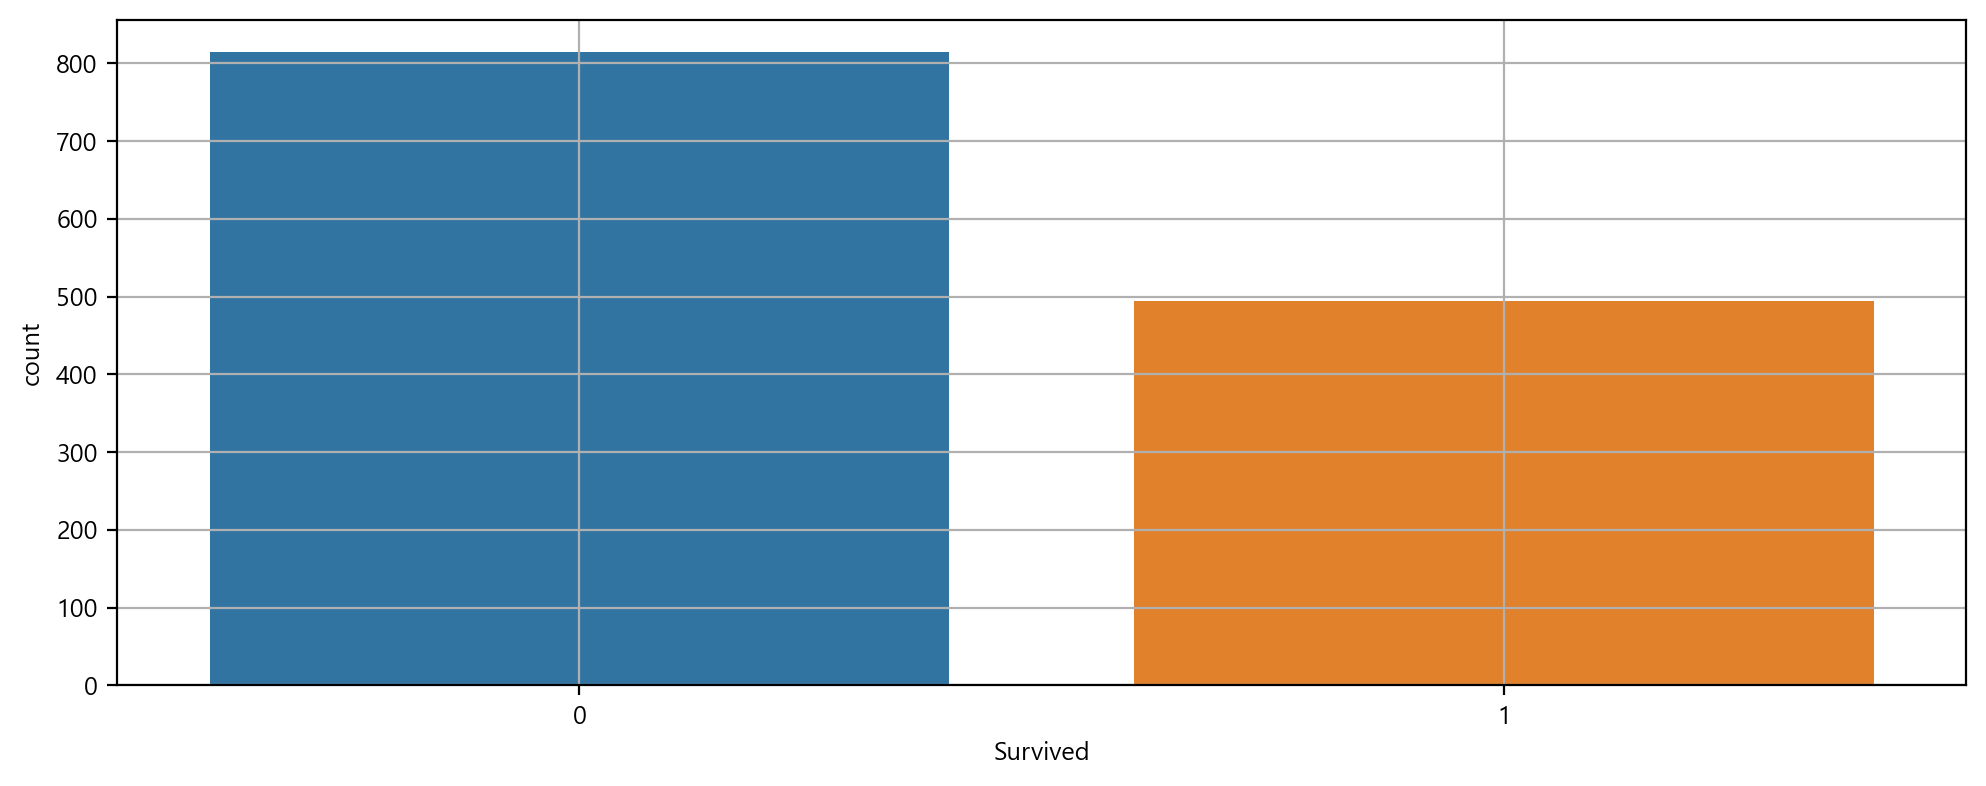

In [3]:
my_countplot(origin, 'Survived')

> 생존자보다 사망자가 더 많다.

### [2] 나이 (연속형)

#### (1) 전체 나이 분포

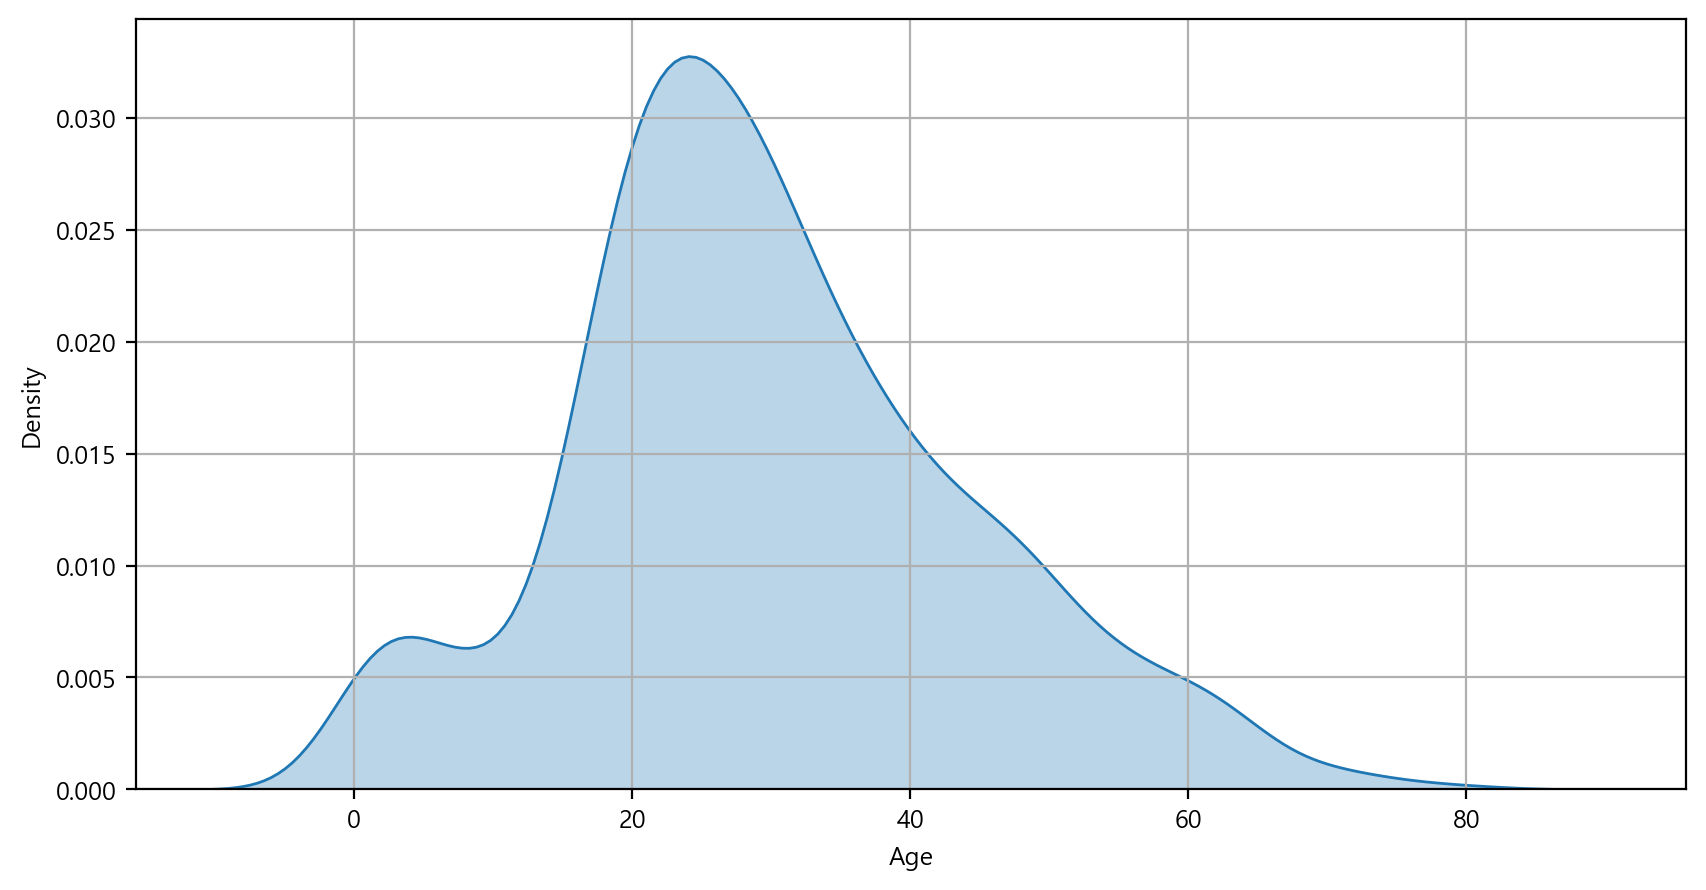

In [4]:
my_kdeplot(origin, 'Age', fill=True, dpi=200)

> `20~40` 사이의 연령층이 가장 많이 분포되어 있다.
>
> 노약자층에서는 60대 이상의 노년층 보다 10세 이하의 어린이가 더 많이 탑승했다.

#### (2) 생존여부에 따른 나이 분포

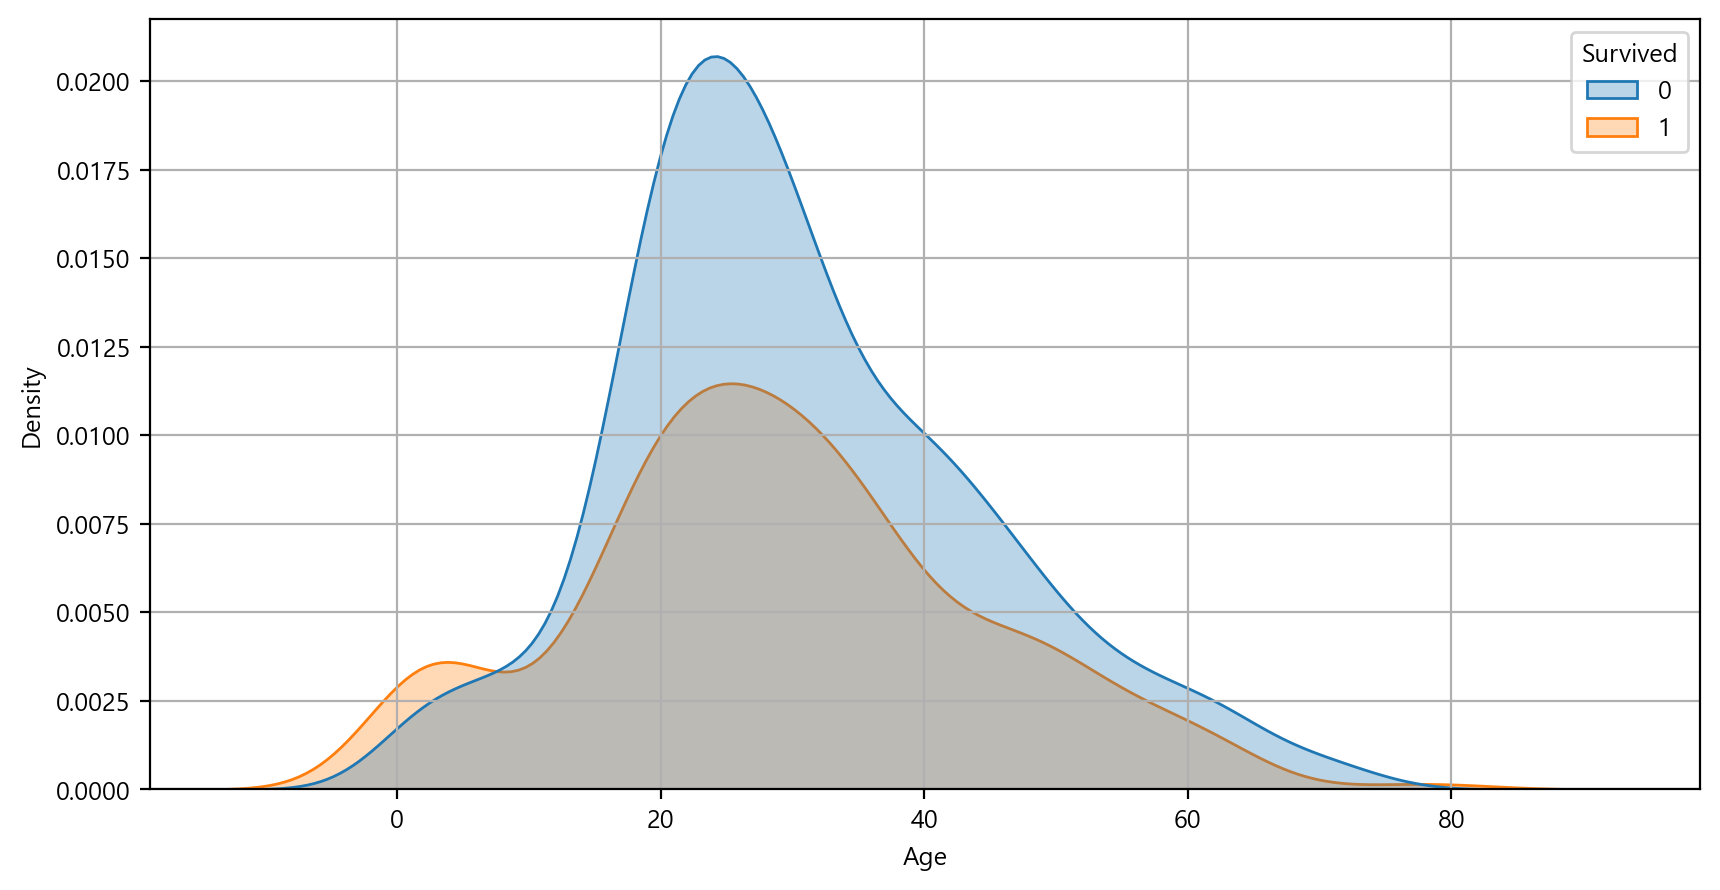

In [5]:
my_kdeplot(origin, 'Age', hue='Survived', fill=True, dpi=200)

> 어린이와 청소년층의 경우 사망자 대비 생존자가 더 많이 분포 된 것이 확인된다.
> 
> 20세 이상~80세 정도의 연령층에서는 사망자가 더 많이 분포된 것이 확인된다.
> 
> 위 내용으로 미루어 보아 나이는 생존 여부에 영향을 주는 요인으로 판단되어 결측치를 대체하기로 결정

### [3] 형제자매/배우자 수 (연속형)

#### (1) 전체 데이터 분포

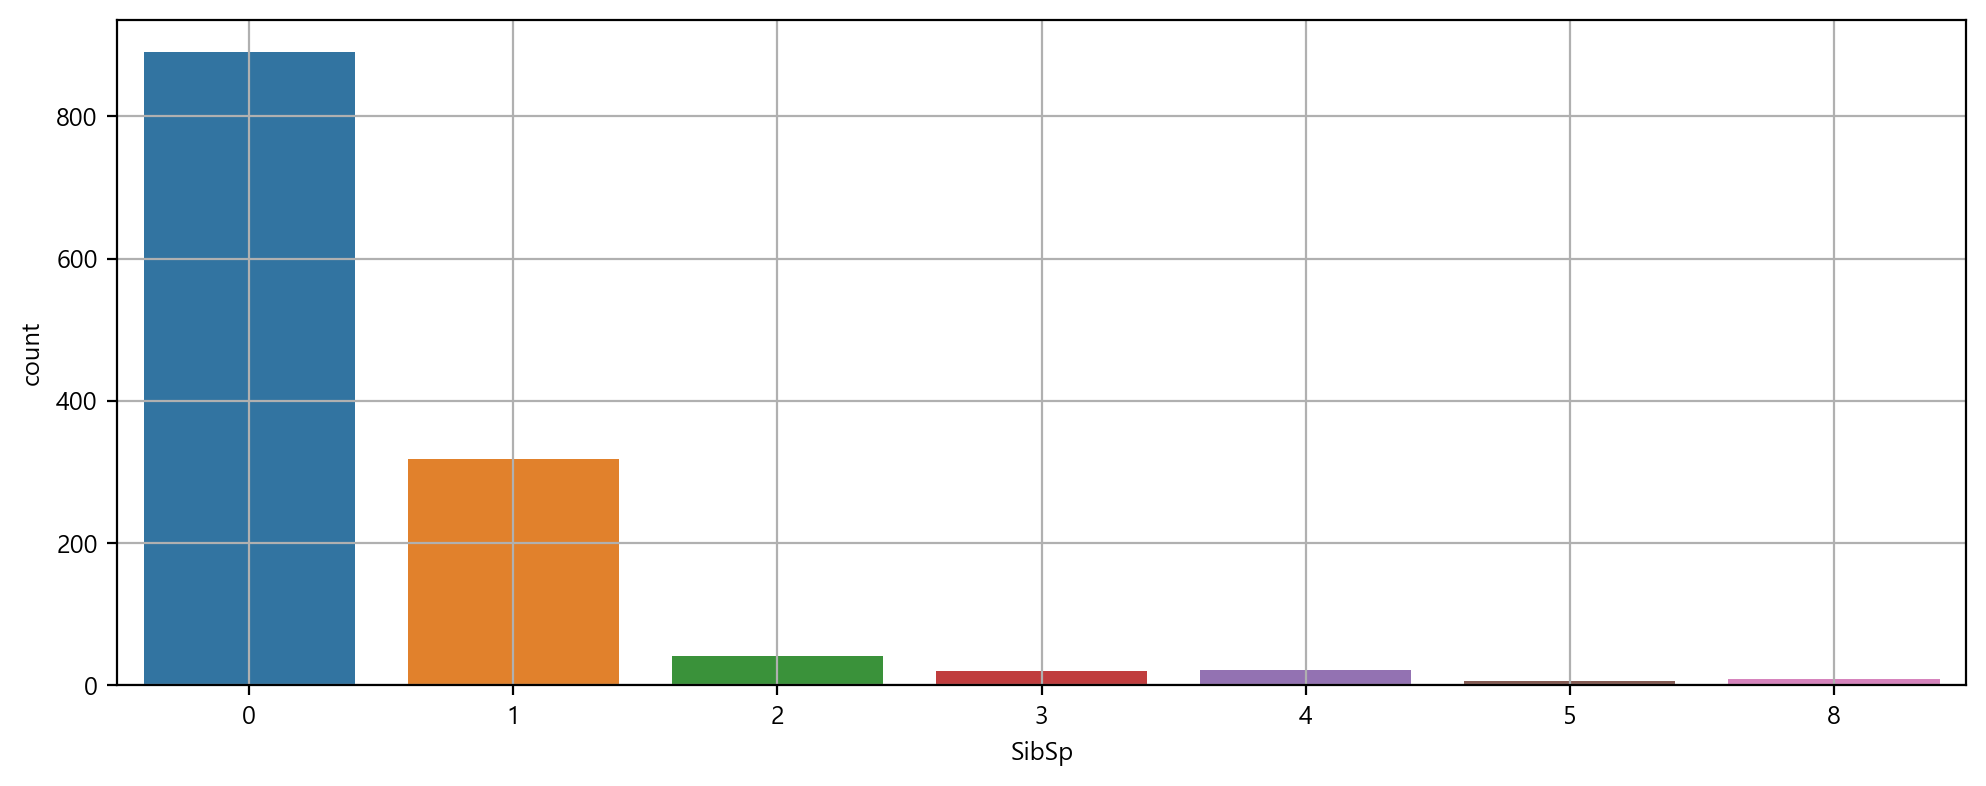

In [6]:
my_countplot(origin, 'SibSp', dpi=200)

> 형제자매 혹은 배우자 없이 혼자 탑승한 경우가 가장 많았으며 두 번째로 1명의 가족과 함께 탑승한 경우가 많았다.

#### (2) 생존 여부에 따른 형제자매/배우자 수

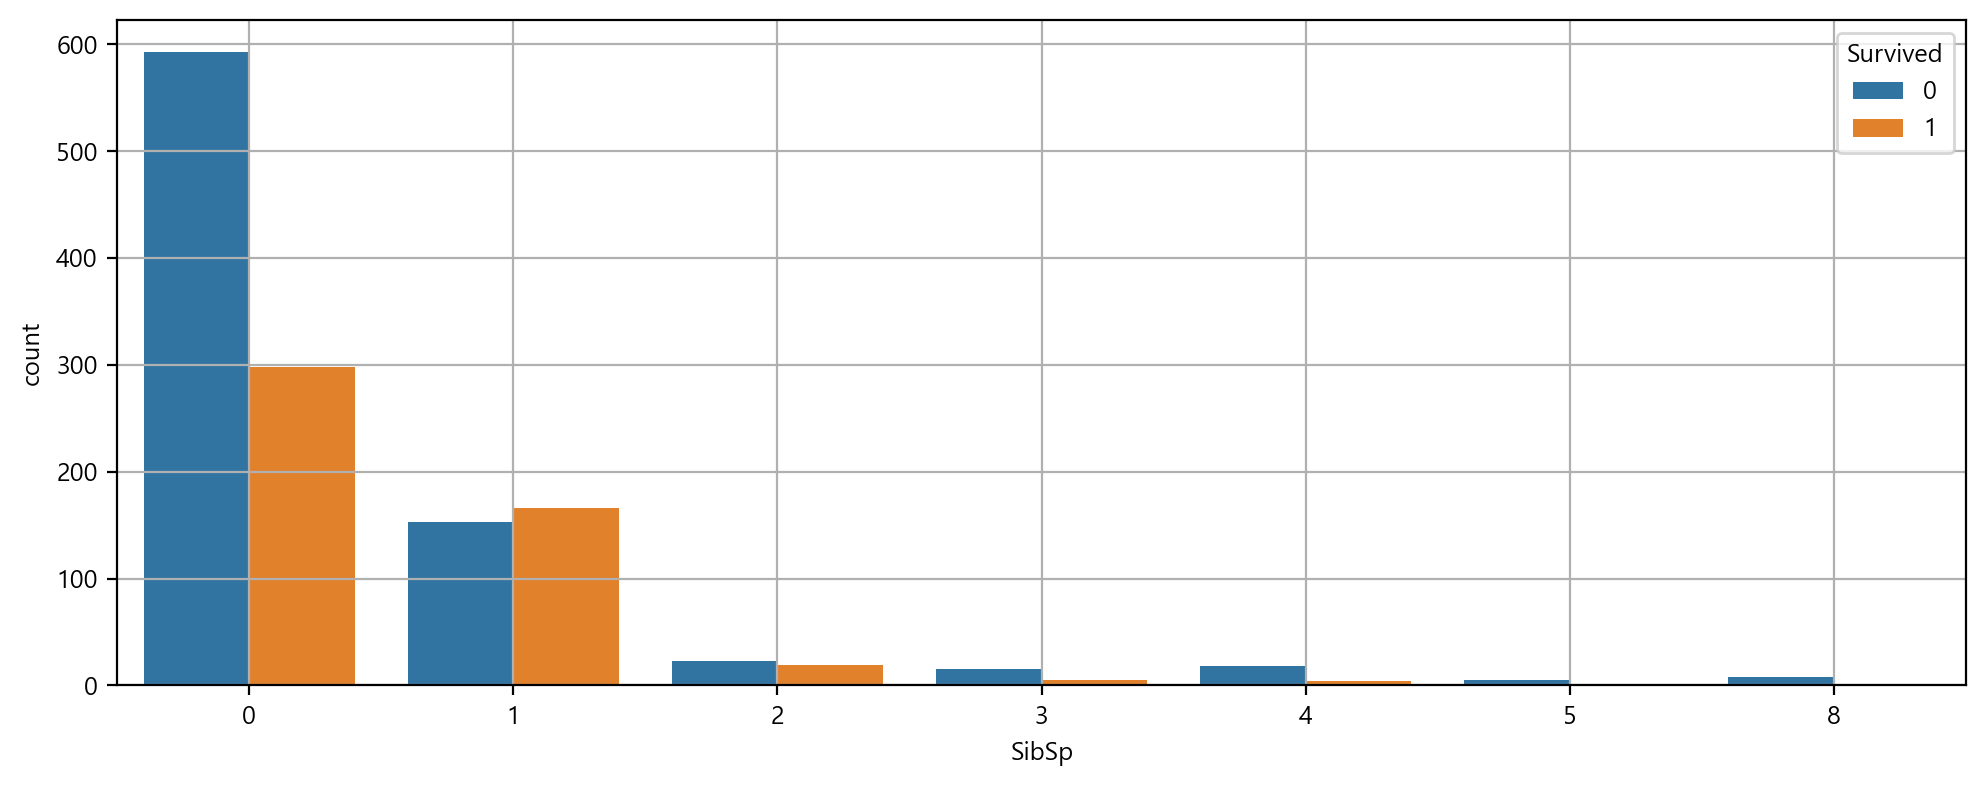

In [7]:
my_countplot(origin, 'SibSp', hue='Survived', dpi=200)

> 혼자 탑승한 경우는 생존자보다 사망자가 더 많았다. 전체적으로 사망자 수가 생존자 수 보다 많기 때문에 이는 타당한 비율로 보인다.
>
> 하지만 1명의 가족과 함께 탑승한 경우는 사망자보다 생존자의 비율이 더 높게 나타났다. 이는 가족중 최소 한명은 살리고자 한 당시 탑승객들의 간절함으로 풀이된다.
>
> 위 내용으로 미루어보아 형제자매/배우자 수는 생존 여부에 영향을 주는 요인으로 판단된다.

### [4] 부모/자녀 수 (연속형)

#### (1) 전체 데이터 분포

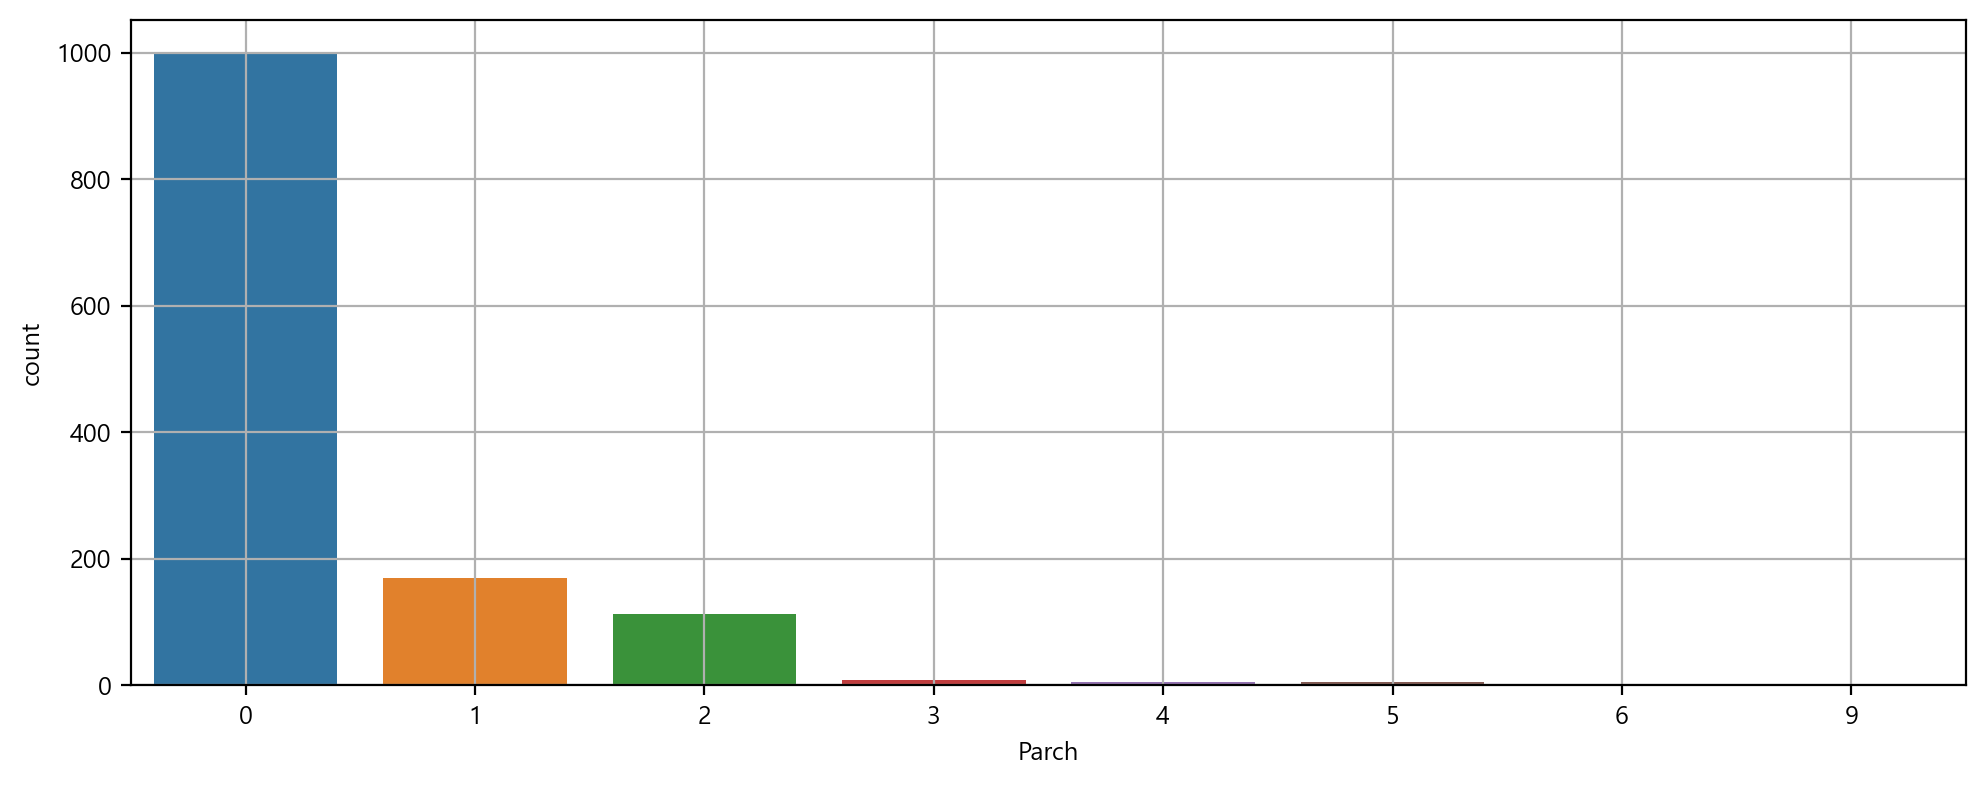

In [8]:
my_countplot(origin, 'Parch', dpi=200)

> 동승자 없이 혼자 탑승한 경우가 가장 많으며 1,2명의 부모 혹은 자녀와 함께 탑승한 경우도 다수 보인다.

#### (2) 생존 여부에 따른 부모/자녀 수

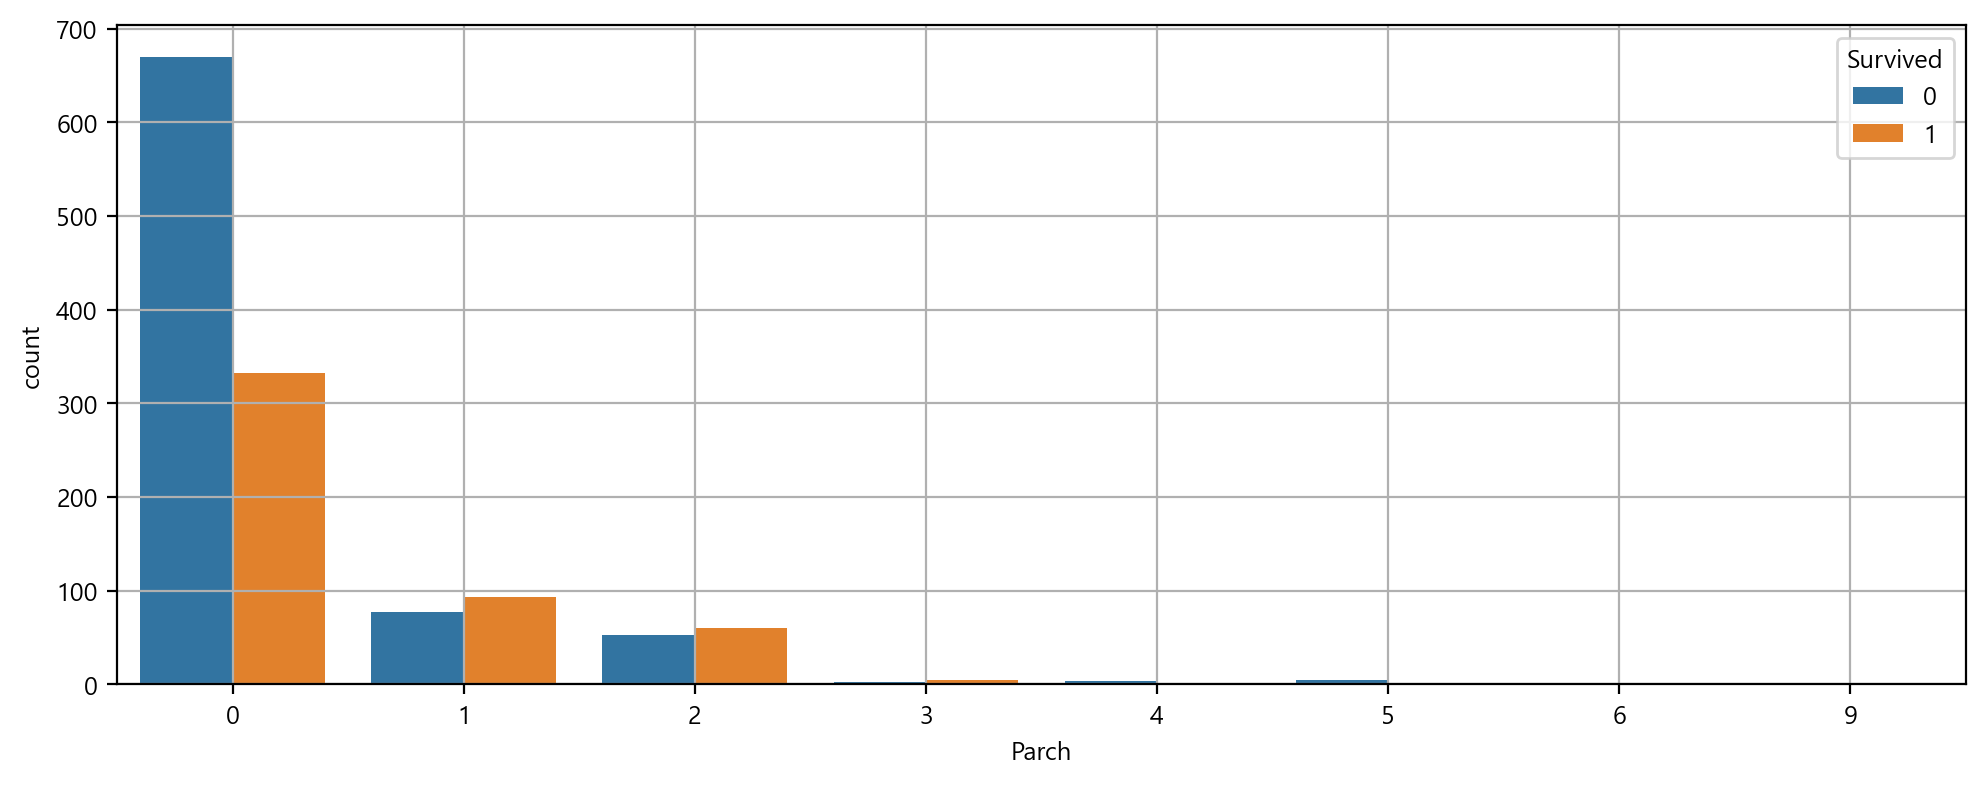

In [9]:
my_countplot(origin, 'Parch', hue='Survived', dpi=200)

> 혼자 탑승한 경우는 생존자보다 사망자가 더 많았다. 전체적으로 사망자 수가 생존자 수 보다 많기 때문에 이는 타당한 비율로 보인다.
>
> 하지만 1,2명 부모나 자녀와 함께 탑승한 경우는 사망자보다 생존자의 비율이 더 높게 나타났다.
> 최소한 자녀 혹은 부모라도 살리고자 하는 가족의 간절한 마음이 반영된 것으로 풀이된다.
>
> 위 내용으로 미루어보아 부모/자녀 수는 생존 여부에 영향을 주는 요인으로 판단된다.

### [5] 여객운임 (연속형)

#### (1) 전체 데이터 분포

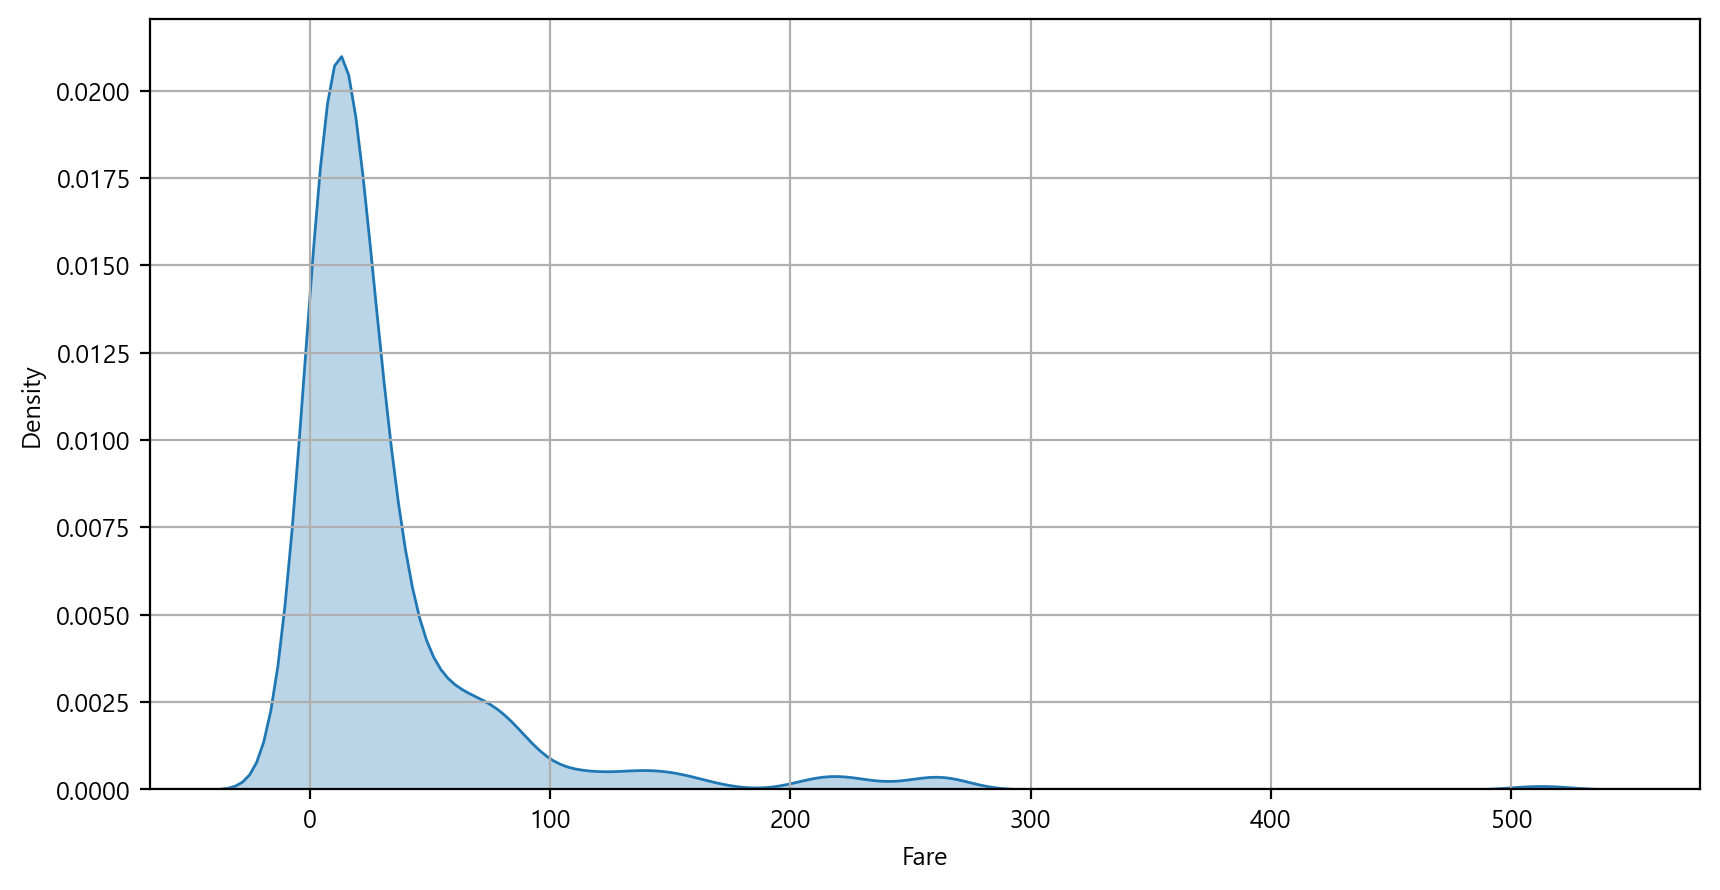

In [10]:
my_kdeplot(origin, 'Fare', fill=True, dpi=200)

> 50 이하의 저가 운임을 낸 탑승객이 가장 많으며 그 이상의 고가 운임을 지불한 탑승객도 확인된다.

#### (2) 생존 여부에 따른 여객 운임

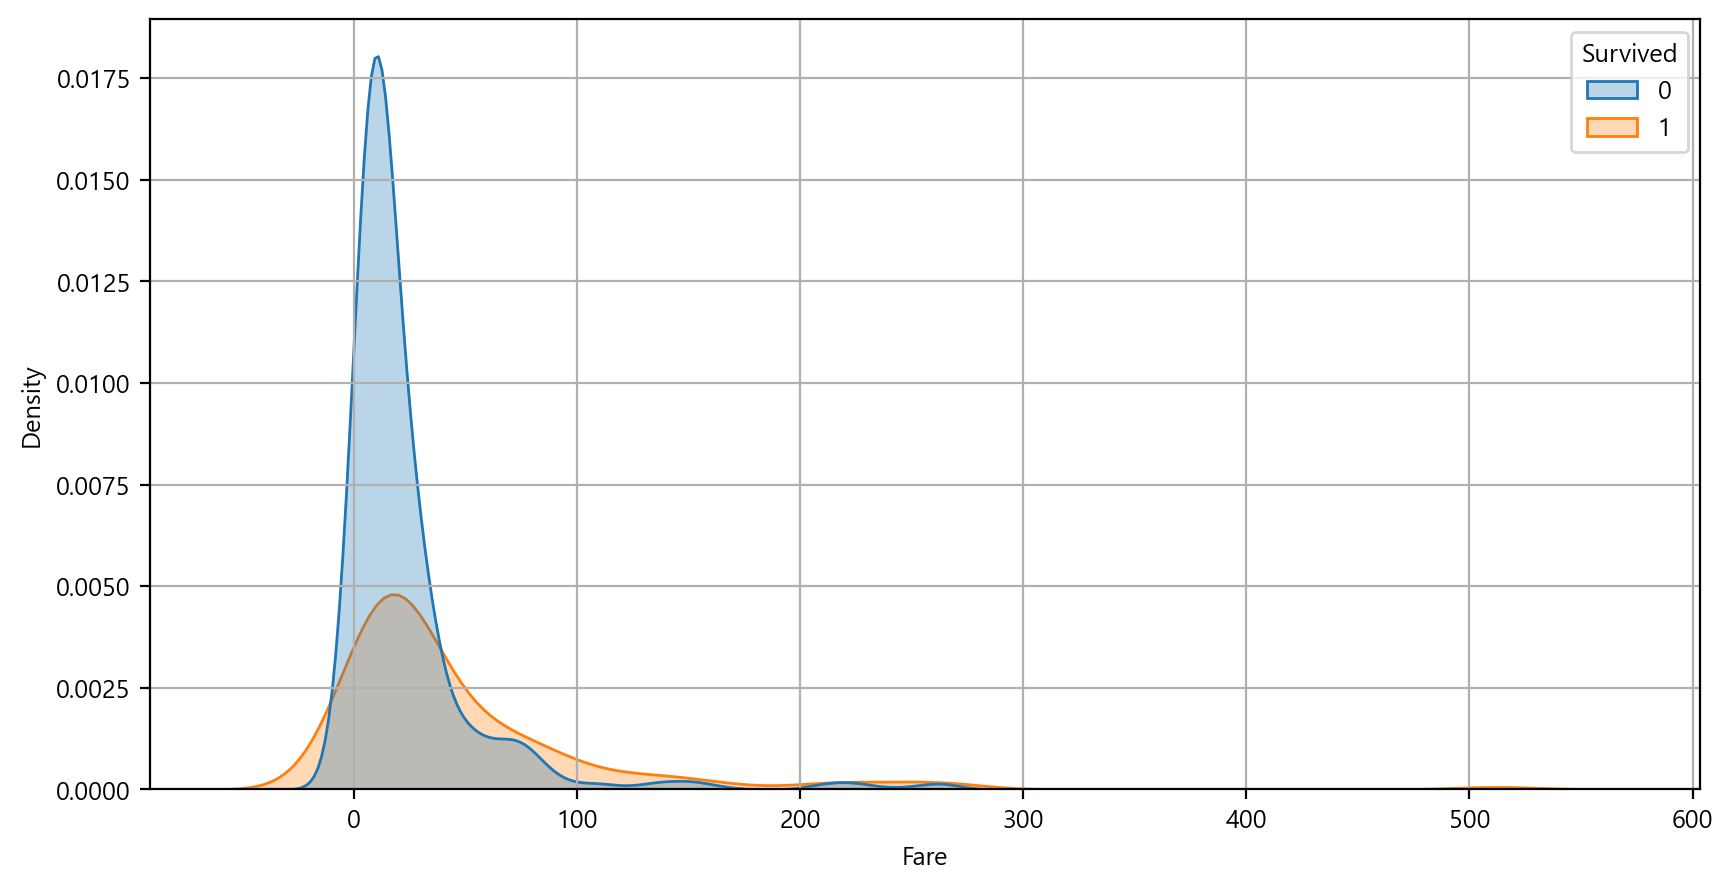

In [11]:
my_kdeplot(origin, 'Fare', hue='Survived', fill=True, dpi=200)

> 저가형 티켓을 구입한 탑승객의 경우 사망자 비율에 비해 생존자 비율이 매우 낮게 나타났다.
>
> 하지만 고가형 티켓을 구입한 탑승객의 경우 사망자보다 생존자가 더 많은 것으로 확인된다.
> (더러운 세상... ㅜㅜ)
>
> 이 내용으로 보아 여객운임은 생존 여부에 영향을 주는 요인으로 판단된다.
>
> 결측치가 1건밖에 존재하지 않기 때문에 전체적인 분석 결과에 큰 영향이 없을 것으로 보고 이 변수에 대한 결측치는 삭제하도록 하자.

### [6] 티켓 등급 (명목형)

#### (1) 티켓 등급별 탑승객 수

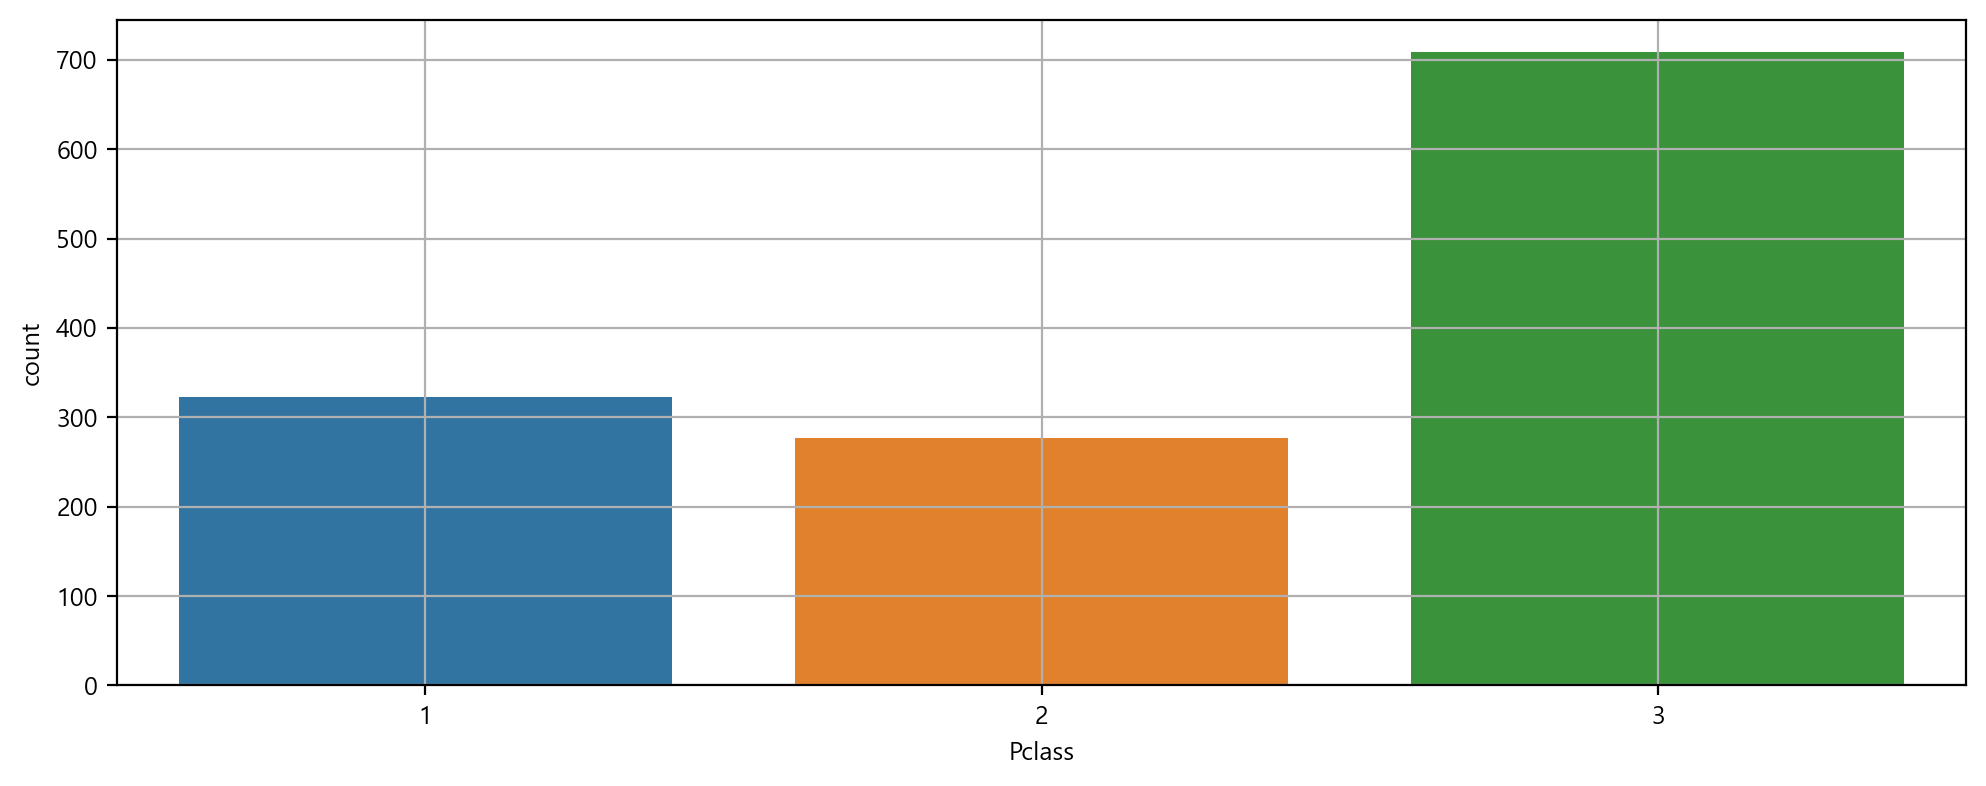

In [12]:
my_countplot(origin, 'Pclass', dpi=200)

> 3등급, 1등급, 2등급 순으로 탑승객이 많다.

#### (2) 티켓 등급에 따른 생존 비율

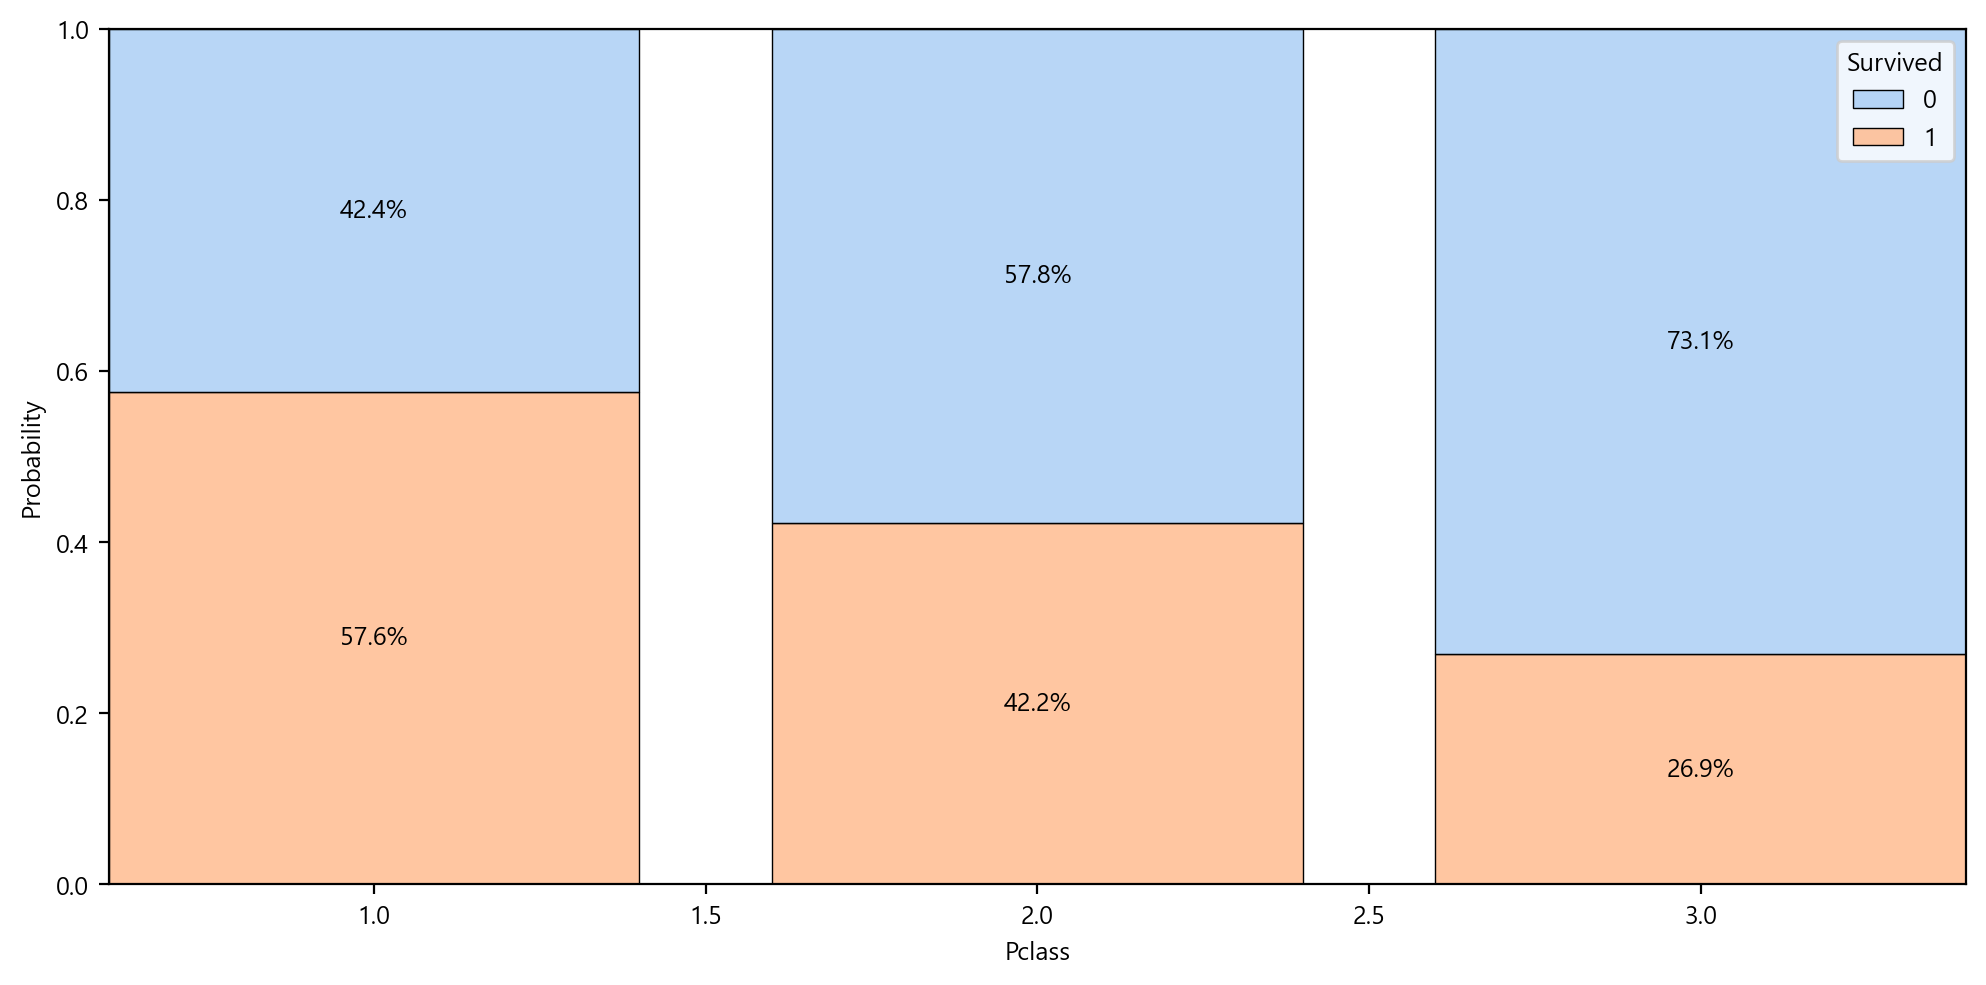

In [13]:
my_stackplot(origin, 'Pclass', hue='Survived', dpi=200, palette="pastel")

> 1등급 객실의 승객이 가장 많은 승객이 탑승한 3등급 객실의 승객보다 생존 비율이 높다.
>
> 유일하게 1등급 객실의 탑승객들의 생존자 비율이 50%가 넘는다.
>
> 그러므로 객실 등급 역시 생존 여부에 영향을 준다고 볼 수 있다.

#### (3) 생존 여부에 따른 객실 비율

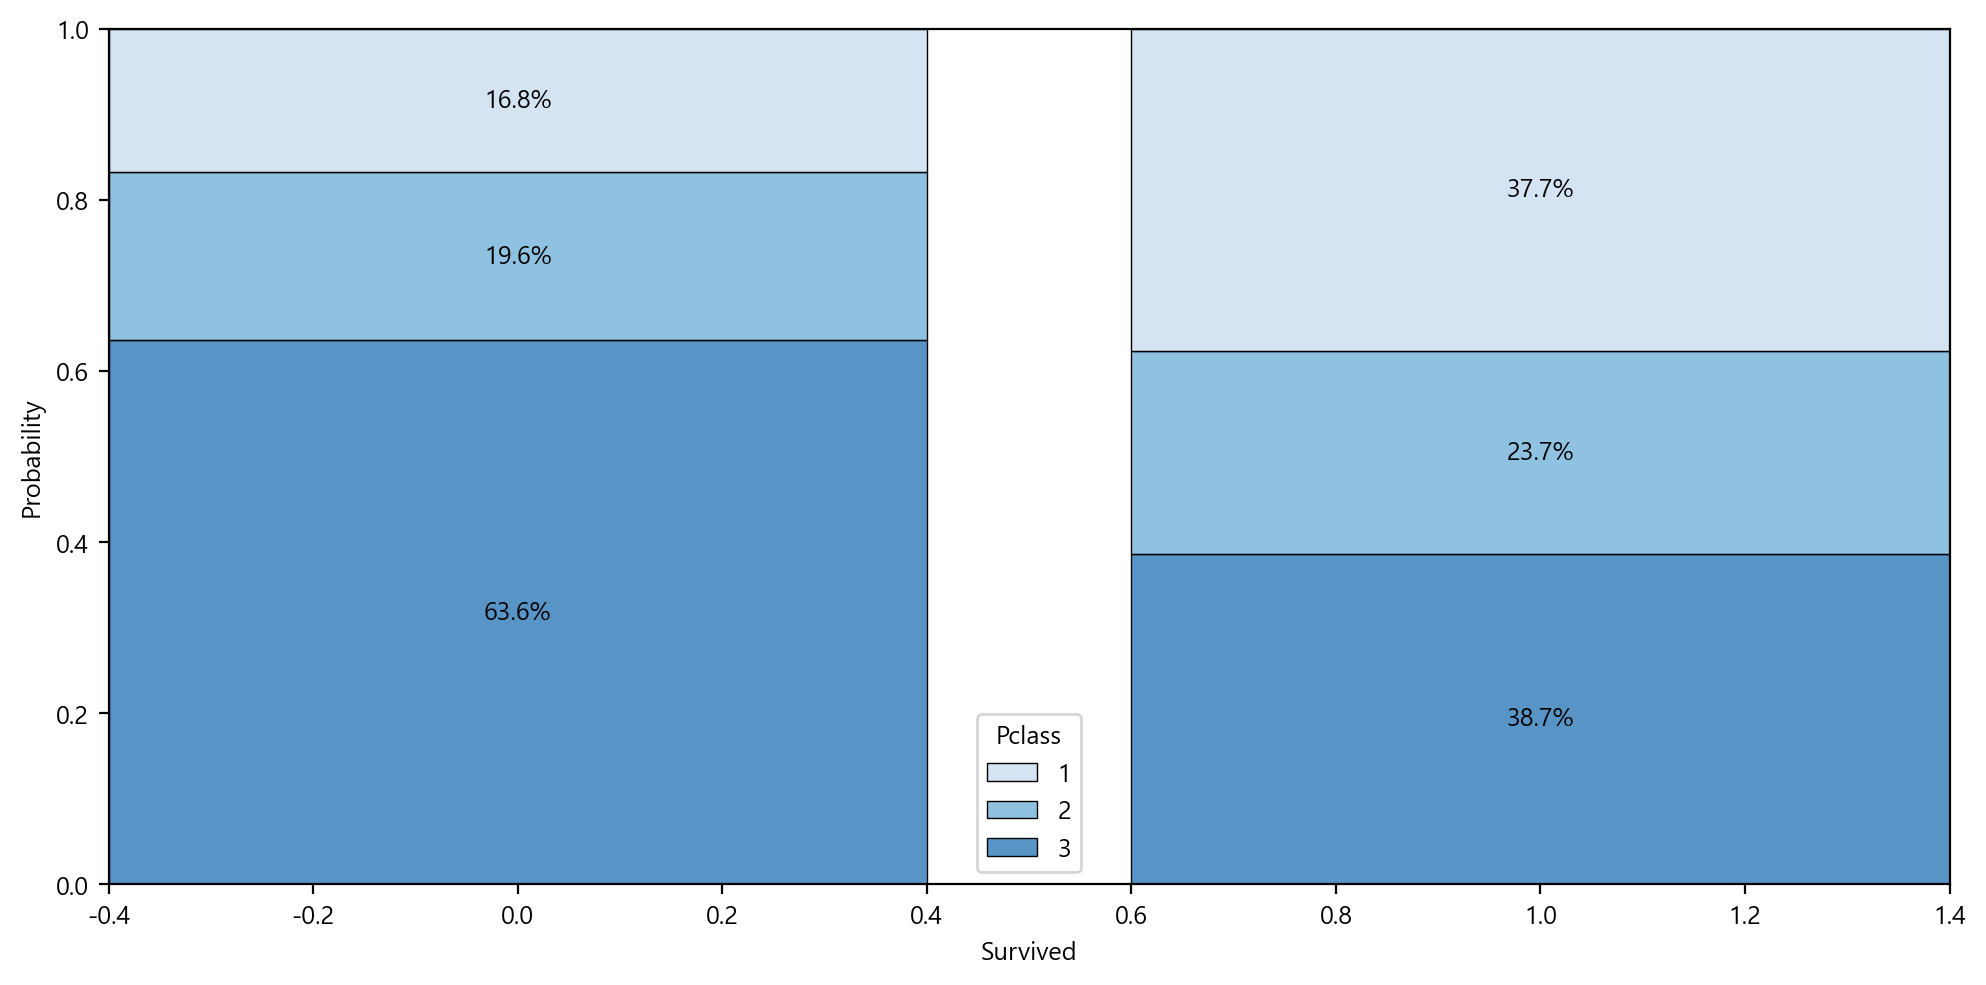

In [14]:
my_stackplot(origin, 'Survived', hue='Pclass', dpi=200, palette="Blues")

> 사망자 그룹에서는 3등급 객실의 비중이 높지만 생존자 그룹에서는 1등급과 3등급의 비율이 비슷하다.
>
> 3등급 객실 탑승객의 수가 1등급 객실 탑승객보다 더 많았다는 것을 감안할 때 1등급 객실의 탑승객들이 우선적으로 구조되었다고 볼 수 있다.
>
> 이 내용으로 미루어보아 객실 등급은 생존 여부에 영향을 주는 요인이라 볼 수 있다.

### [7] 성별 (명목형)

#### (1) 전체 성비

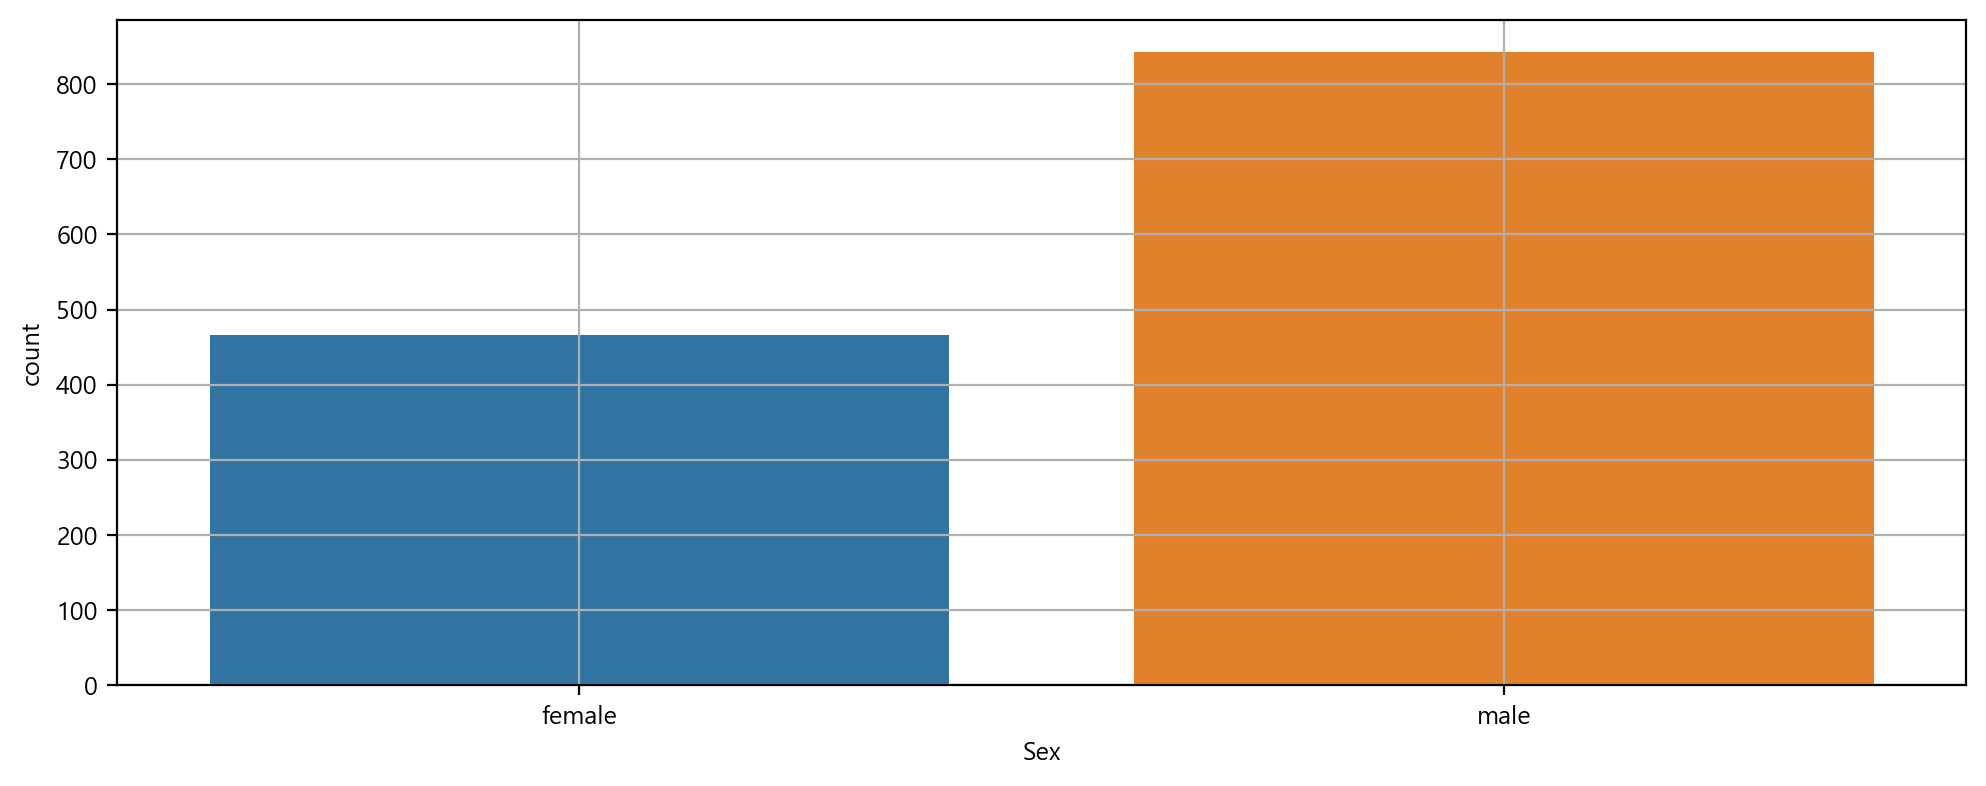

In [15]:
my_countplot(origin, 'Sex', dpi=200)

> 전체적으로 남성 탑승객의 수가 많다.

#### (2) 성별에 따른 생존비율

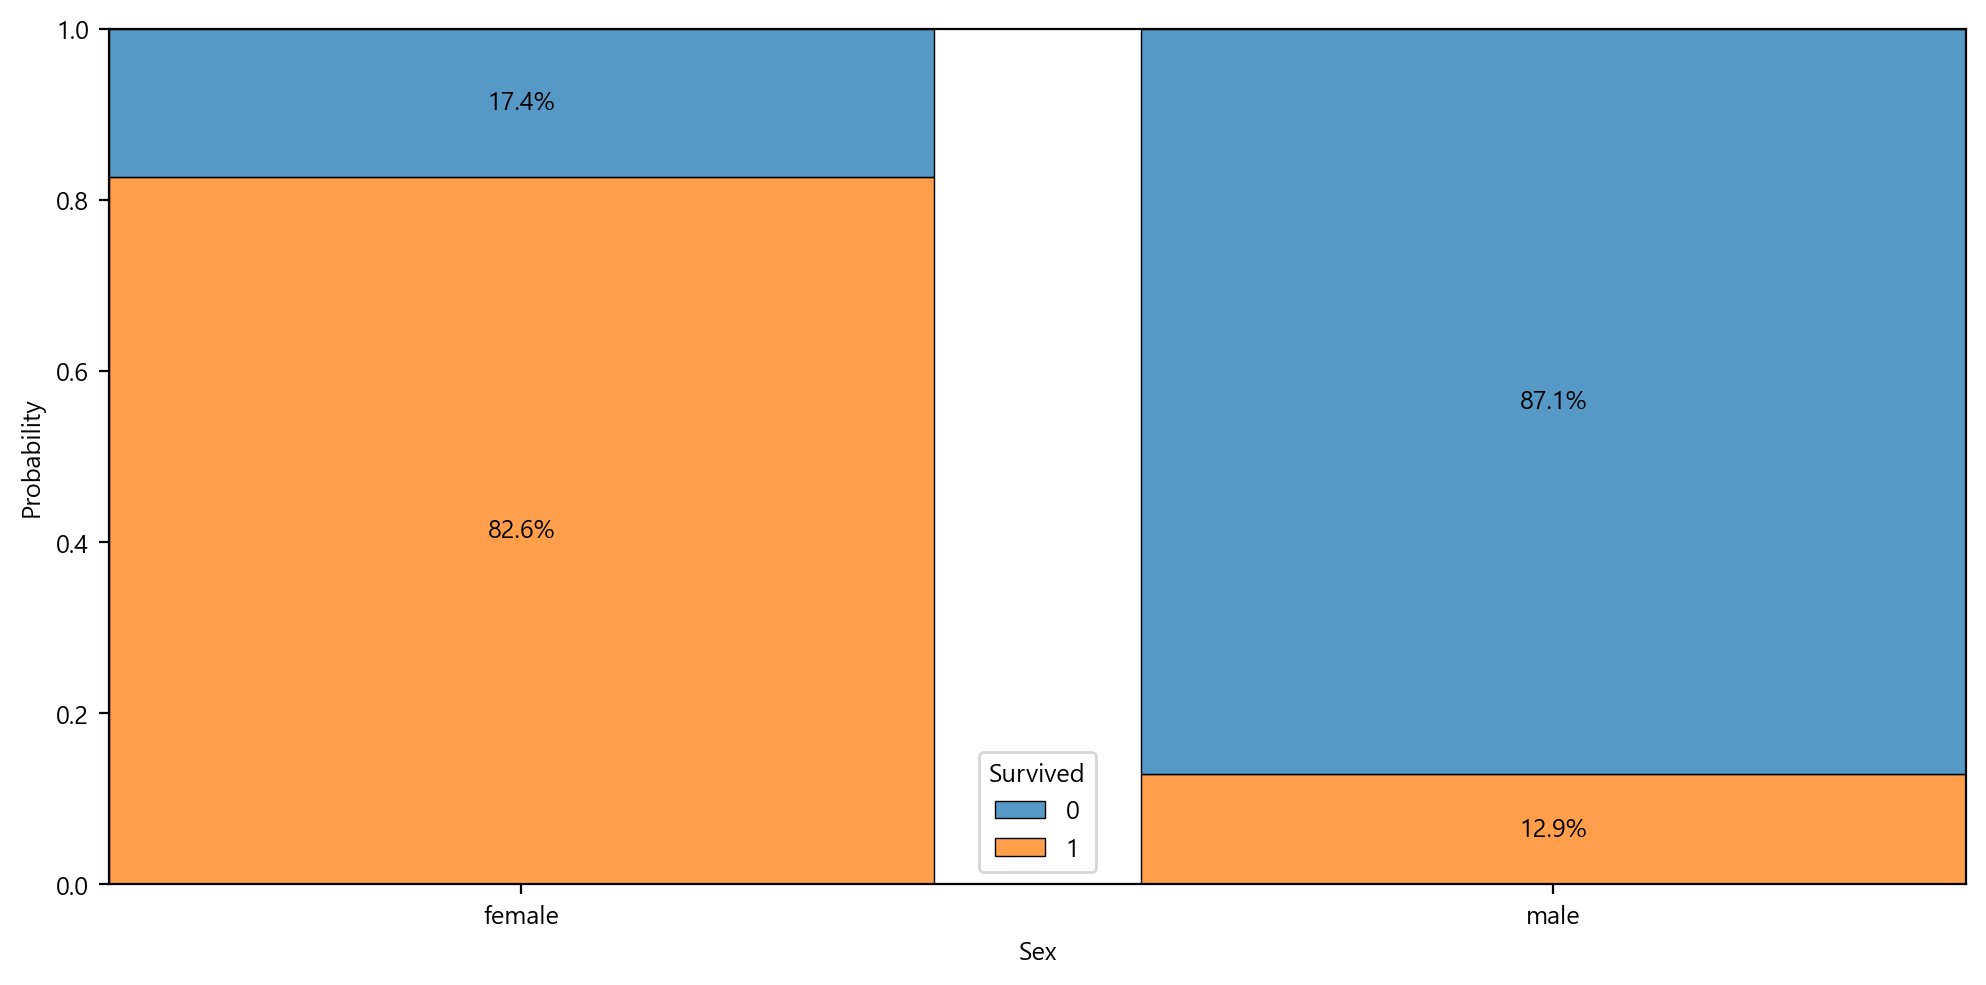

In [16]:
my_stackplot(origin, 'Sex', hue='Survived', dpi=200)

> 여성 탑승객은 생존자 비율이 더 높지만 남성 탑승객은 사망자 비율이 더 높다. 이는 여성이 남성보다 우선적으로 구조되었음을 의미한다.
>
> 이를 통해서 성별은 생존률을 결정하는데 중요한 요인임을 알 수 있다.

#### (3) 성별에 따른 생존 여부

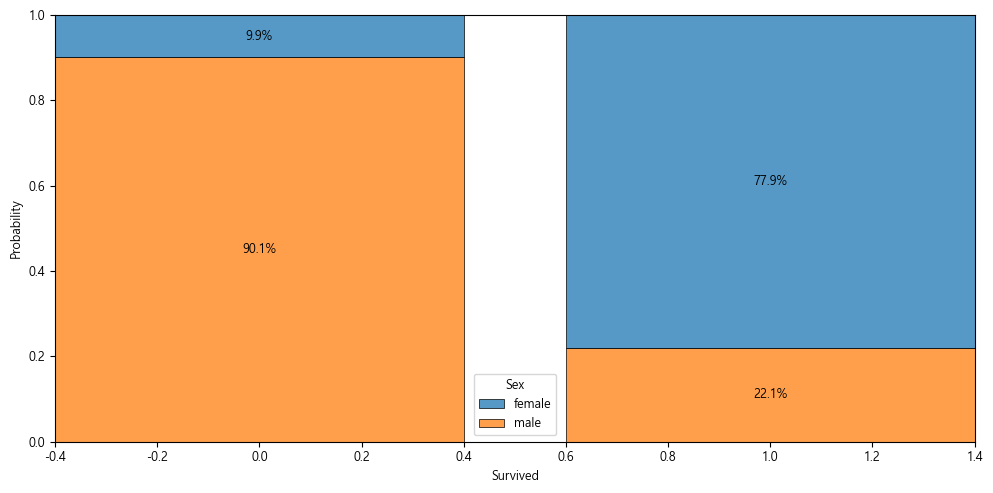

In [17]:
my_stackplot(origin, 'Survived', hue='Sex')

> 여성이 남성보다 우선적으로 구조되었음을 알 수 있다.

### [8] 탑승지

#### (1) 전체 데이터 분포

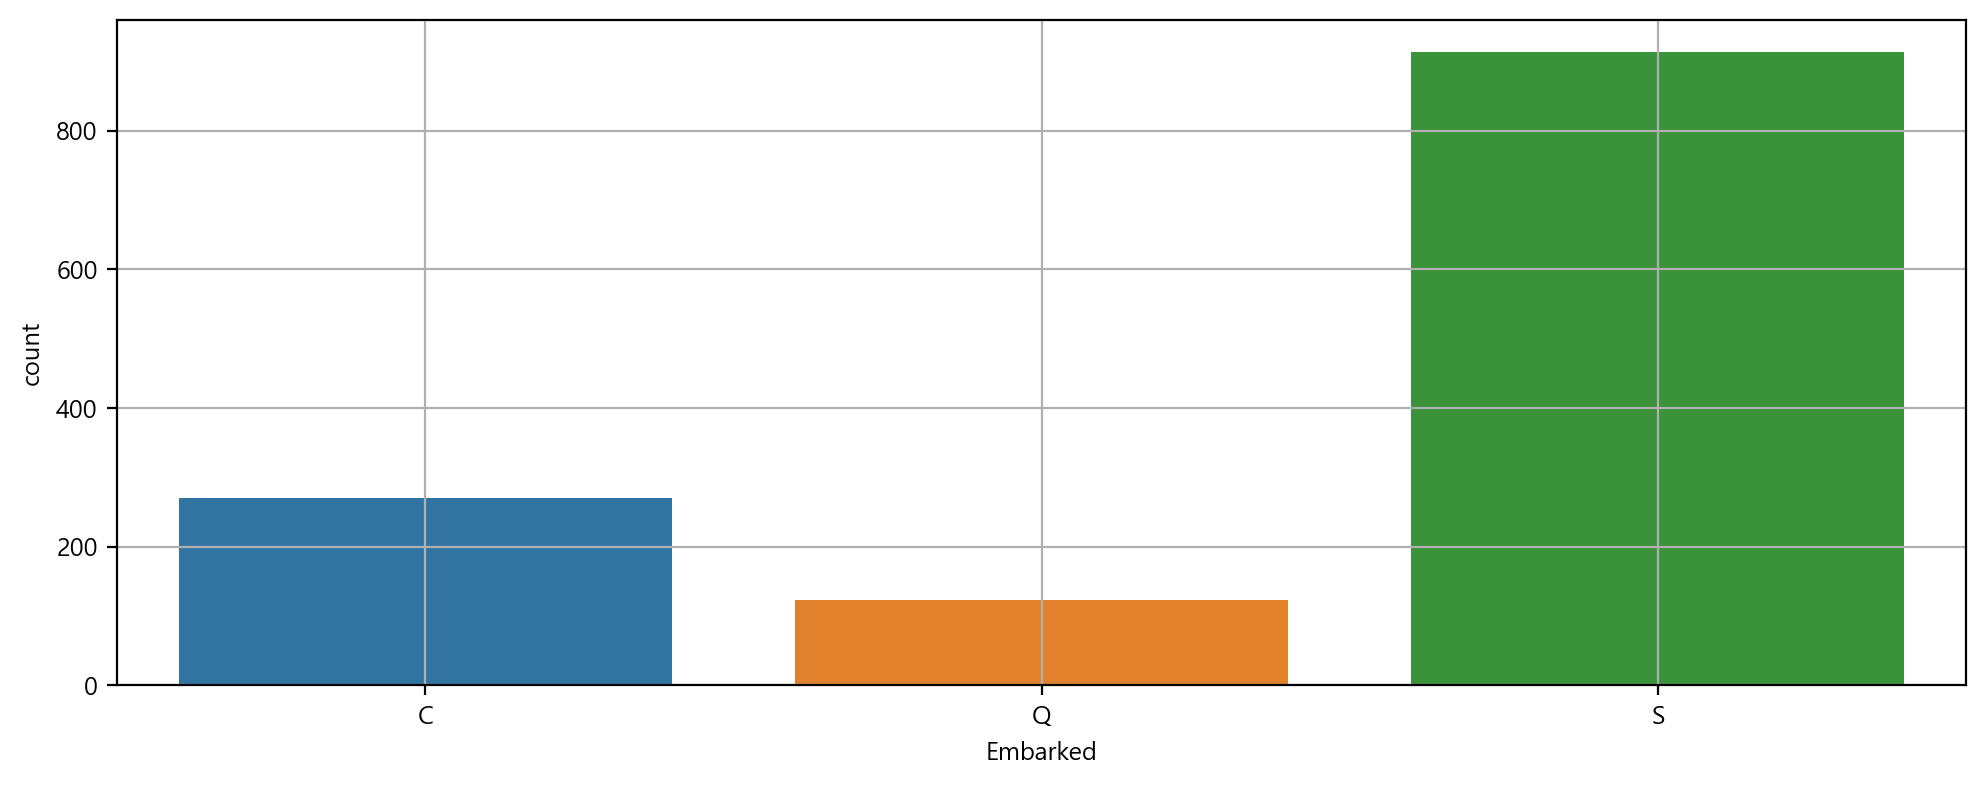

In [18]:
my_countplot(origin, xname='Embarked', dpi=200)

#### (2) 탑승지에 따른 생존 비율

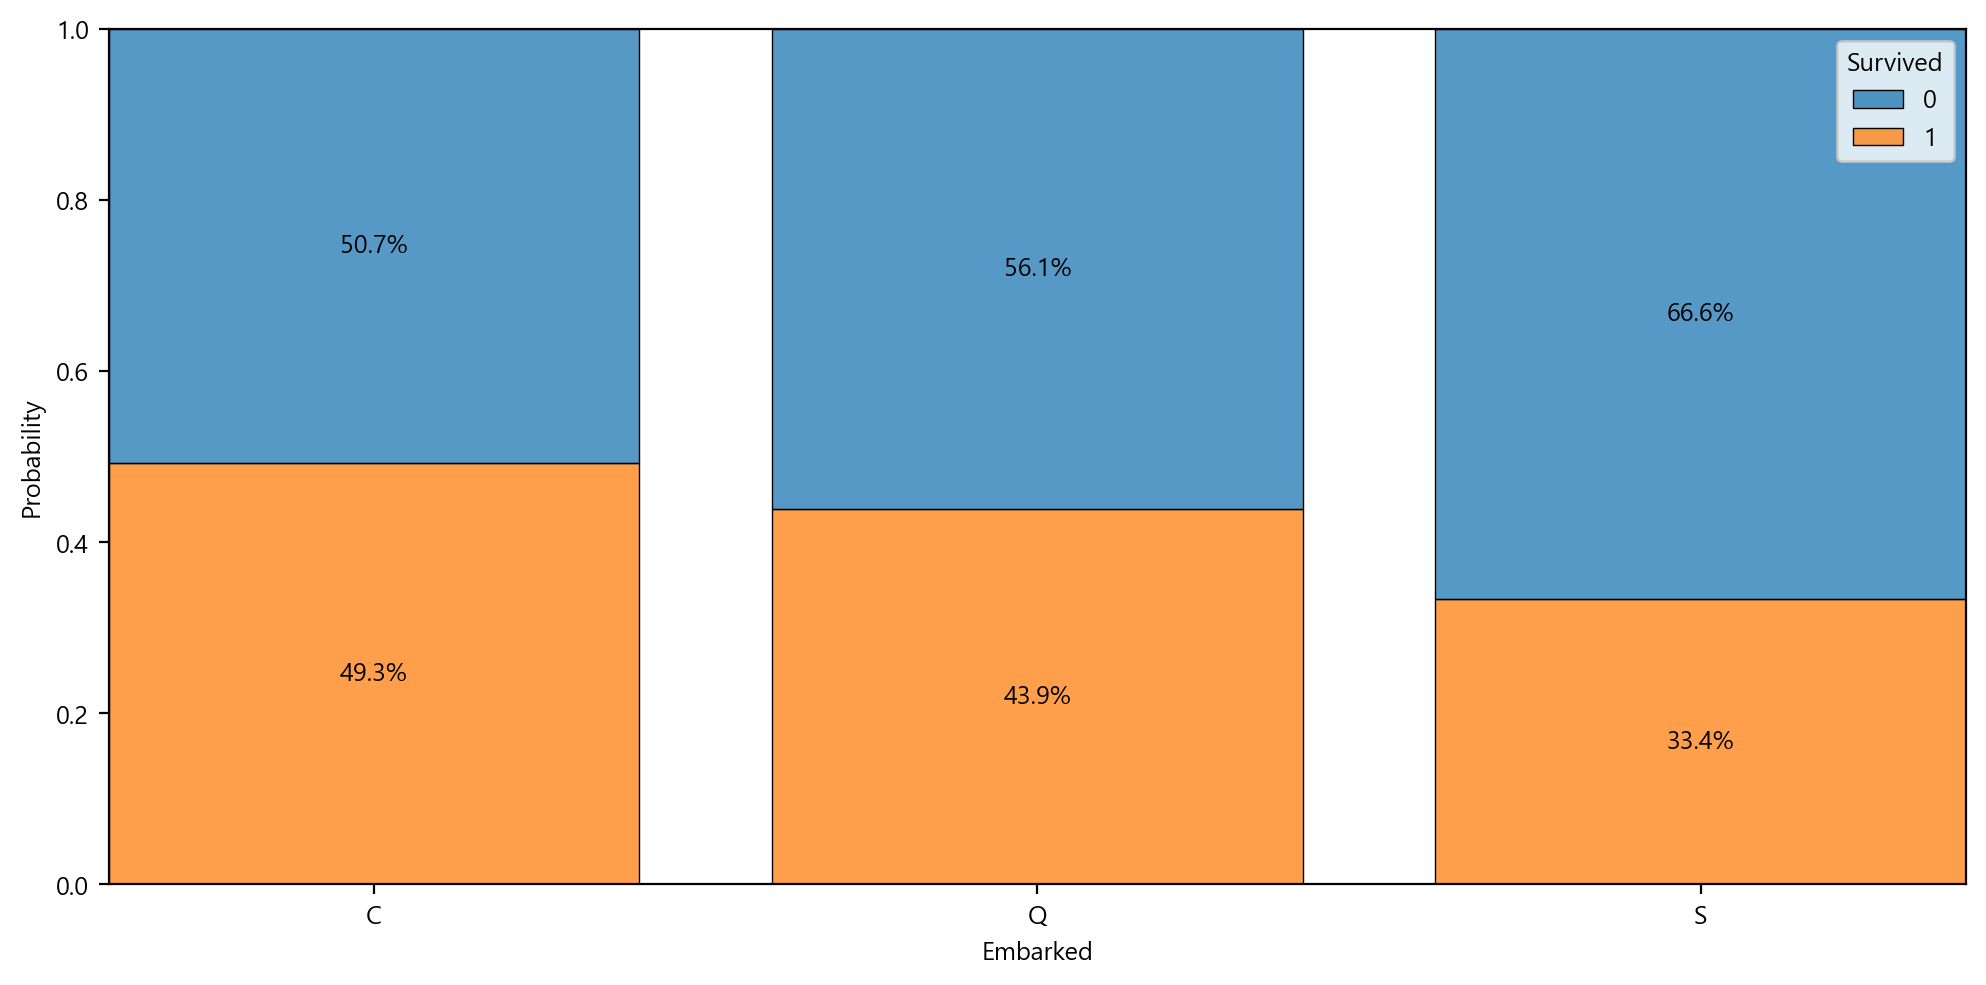

In [19]:
my_stackplot(origin, 'Embarked', hue='Survived', dpi=200)

> 큰 차이를 보이는 것은 아니지만 사우샘프턴에서 탑승한 승객들에 대한 사망자 비율이 다소 높게 나타난다.

### [9] 객실번호

#### (1) 데이터 카운트

In [20]:
origin['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: Cabin, Length: 186, dtype: int64

> 값의 종류별로 카운트를 하는 것 만으로 186개 종류가 나타난다. 통제요인으로 사용하기에는 값의 종류가 너무 많아서 적절하지 않은 것으로 보인다.
>
> 이 변수는 제외하는 것으로 판단

## #03. 데이터 전처리

1. 이름(`Name`)과 티켓번호(`Ticket`), 객실번호(`Cabin`) 변수 삭제
2. 나이(`Age`)에 대해서 결측치를 평균으로 대체
3. 여객운임(`Fare`)과 탑승지(`Embarked`)의 경우 결측치가 1,2건만 발생하므로 결측치삭제
4. 그 외의 연속형 변수는 스케일링
5. 성별 데이터를 라벨링
6. 나머지 명목형 변수는 더미변수화

### [1] 불필요한 변수 삭제

In [21]:
df = origin.drop(['Name', 'Ticket', 'Cabin'], axis=1)
my_pretty_table(df.head())

+---------------+------------+----------+--------+-------+---------+---------+---------+------------+
|   PassengerId |   Survived |   Pclass | Sex    |   Age |   SibSp |   Parch |    Fare | Embarked   |
|---------------+------------+----------+--------+-------+---------+---------+---------+------------|
|             1 |          0 |        3 | male   |    22 |       1 |       0 |    7.25 | S          |
|             2 |          1 |        1 | female |    38 |       1 |       0 | 71.2833 | C          |
|             3 |          1 |        3 | female |    26 |       0 |       0 |   7.925 | S          |
|             4 |          1 |        1 | female |    35 |       1 |       0 |    53.1 | S          |
|             5 |          0 |        3 | male   |    35 |       0 |       0 |    8.05 | S          |
+---------------+------------+----------+--------+-------+---------+---------+---------+------------+


### [2] 나이의 결측치를 평균으로 대체

In [22]:
df_age = my_replace_missing_value(df[['Age']])
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     1309 non-null   float64
dtypes: float64(1)
memory usage: 20.5 KB


In [23]:
df['Age'] = df_age['Age']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  1309 non-null   category
 1   Pclass    1309 non-null   category
 2   Sex       1309 non-null   category
 3   Age       1309 non-null   float64 
 4   SibSp     1309 non-null   int64   
 5   Parch     1309 non-null   int64   
 6   Fare      1308 non-null   float64 
 7   Embarked  1307 non-null   category
dtypes: category(4), float64(2), int64(2)
memory usage: 56.7 KB


### [3] 데이터 수가 적은 변수에 대해 결측치 삭제

In [24]:
df2 = df.dropna()
df2.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### [4] 그 외의 연속형 변수는 스케일링

In [25]:
df3 = my_standard_scaler(df2, 'Survived')
my_pretty_table(df3.head())

+---------------+-----------+-----------+-----------+-----------+----------+--------+------------+------------+
|   PassengerId |       Age |     SibSp |     Parch |      Fare |   Pclass | Sex    | Embarked   |   Survived |
|---------------+-----------+-----------+-----------+-----------+----------+--------+------------+------------|
|             1 | -0.609933 |  0.479763 | -0.445612 | -0.501949 |        3 | male   | S          |          0 |
|             2 |  0.636914 |  0.479763 | -0.445612 |  0.735501 |        1 | female | C          |          1 |
|             3 | -0.298221 | -0.479763 | -0.445612 | -0.488905 |        3 | female | S          |          1 |
|             4 |   0.40313 |  0.479763 | -0.445612 |  0.384107 |        1 | female | S          |          1 |
|             5 |   0.40313 | -0.479763 | -0.445612 | -0.486489 |        3 | male   | S          |          0 |
+---------------+-----------+-----------+-----------+-----------+----------+--------+------------+------

### [5] 성별 데이터 라벨링

In [26]:
df4 = my_labelling(df3, 'Sex')
my_pretty_table(df4.head())

+---------------+-----------+-----------+-----------+-----------+----------+-------+------------+------------+
|   PassengerId |       Age |     SibSp |     Parch |      Fare |   Pclass |   Sex | Embarked   |   Survived |
|---------------+-----------+-----------+-----------+-----------+----------+-------+------------+------------|
|             1 | -0.609933 |  0.479763 | -0.445612 | -0.501949 |        3 |     1 | S          |          0 |
|             2 |  0.636914 |  0.479763 | -0.445612 |  0.735501 |        1 |     0 | C          |          1 |
|             3 | -0.298221 | -0.479763 | -0.445612 | -0.488905 |        3 |     0 | S          |          1 |
|             4 |   0.40313 |  0.479763 | -0.445612 |  0.384107 |        1 |     0 | S          |          1 |
|             5 |   0.40313 | -0.479763 | -0.445612 | -0.486489 |        3 |     1 | S          |          0 |
+---------------+-----------+-----------+-----------+-----------+----------+-------+------------+------------+


### [6] 나머지 명목형 변수는 더미변수화

In [27]:
df5 = my_dummies(df4, "Pclass", "Embarked")
my_pretty_table(df5.head())

+---------------+-----------+-----------+-----------+-----------+-------+------------+------------+------------+--------------+--------------+
|   PassengerId |       Age |     SibSp |     Parch |      Fare |   Sex |   Survived |   Pclass_2 |   Pclass_3 |   Embarked_Q |   Embarked_S |
|---------------+-----------+-----------+-----------+-----------+-------+------------+------------+------------+--------------+--------------|
|             1 | -0.609933 |  0.479763 | -0.445612 | -0.501949 |     1 |          0 |          0 |          1 |            0 |            1 |
|             2 |  0.636914 |  0.479763 | -0.445612 |  0.735501 |     0 |          1 |          0 |          0 |            0 |            0 |
|             3 | -0.298221 | -0.479763 | -0.445612 | -0.488905 |     0 |          1 |          0 |          1 |            0 |            1 |
|             4 |   0.40313 |  0.479763 | -0.445612 |  0.384107 |     0 |          1 |          0 |          0 |            0 |            1 |

### [7] category타입을 int로 변환

In [28]:
df5['Survived'] = df5['Survived'].astype('int')

### [8] 훈련, 검증 데이터 분할

In [29]:
x_train, x_test, y_train, y_test = my_train_test_split(df5, yname='Survived')
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1044, 9), (262, 9), (1044,), (262,))

## #04. 로지스틱 회귀 분석

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 13 |    10 | l2        |          0.856321 |
| 16 |   100 | l2        |          0.856321 |
| 10 |     1 | l2        |          0.854403 |
|  7 |   0.1 | l2        |          0.851537 |
|  4 |  0.01 | l2        |          0.781625 |
|  1 | 0.001 | l2        |          0.636019 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.438352 |      0.45541 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.858238 |     0.851145 | 예측 결과(TN,FP,TP,TN)가 실제 결과

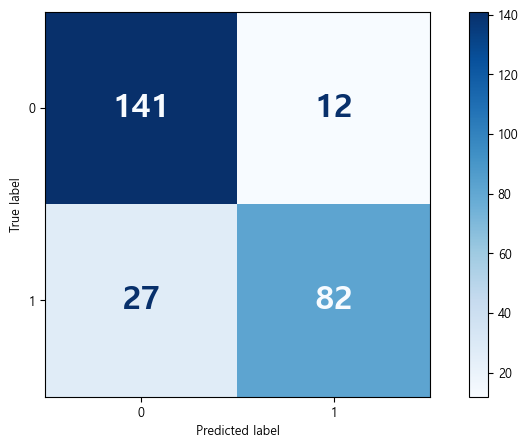


[ROC/PR Curve]


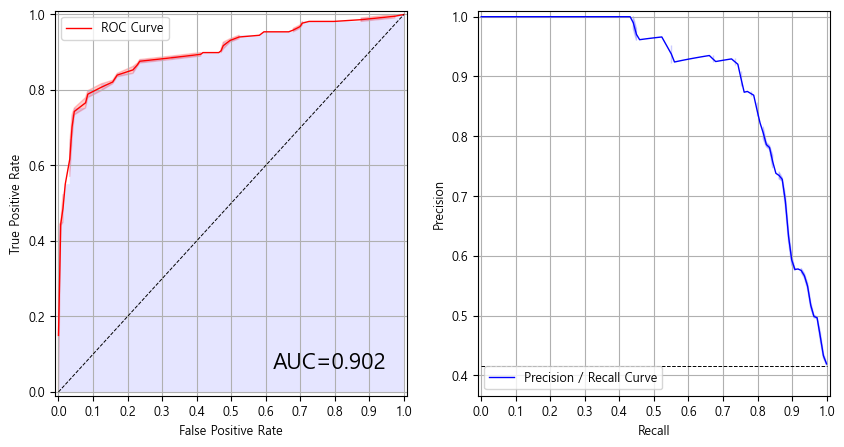


[학습곡선]


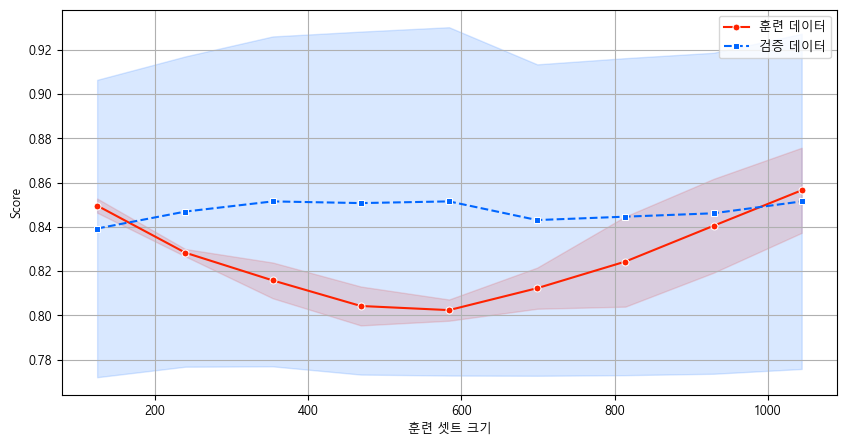

+----+------------+------------+--------------------+------------+---------+------------+------------+
|    | 종속변수   | 독립변수   |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |   OddsRate |
|----+------------+------------+--------------------+------------+---------+------------+------------|
|  0 | Survived   | Age        |            -0.3706 |      0.207 | -1.7894 |      0.074 |     0.6903 |
|  1 | Survived   | SibSp      |            -0.3495 |      0.273 | -1.2784 |      0.201 |     0.7051 |
|  2 | Survived   | Parch      |            -0.0598 |      0.303 |  -0.197 |      0.844 |      0.942 |
|  3 | Survived   | Fare       |             0.1603 |      0.301 |  0.5325 |      0.594 |     1.1739 |
|  4 | Survived   | Sex        |            -3.6728 |       0.42 | -8.7477 |          0 |     0.0254 |
|  5 | Survived   | Pclass_2   |            -0.8571 |      0.625 | -1.3725 |       0.17 |     0.4244 |
|  6 | Survived   | Pclass_3   |            -1.8734 |      0.617 | -3.0341 |      0.002 |     0

In [30]:
estimator = my_logistic_classification(x_train, y_train, x_test, y_test)

## #05. 분석 모형 활용

### [1] 가상의 데이터 만들기

In [36]:
mydf = DataFrame([
    {"Age": 19, "SibSp": 0, "Parch": 0, "Fare": 0, "Sex": 1, "Pclass_2": 0, "Pclass_3": 1, "Embarked_Q": 0, "Embarked_S": 1},
    {"Age": 17, "SibSp": 1, "Parch": 1, "Fare": 100, "Sex": 0, "Pclass_2": 0, "Pclass_3": 0, "Embarked_Q": 0, "Embarked_S": 0},
    {"Age": 34, "SibSp": 1, "Parch": 2, "Fare": 100, "Sex": 0, "Pclass_2": 0, "Pclass_3": 0, "Embarked_Q": 1, "Embarked_S": 0}
], index=['dicaprio', 'winslet', 'me'])

my_pretty_table(mydf)

+----------+-------+---------+---------+--------+-------+------------+------------+--------------+--------------+
|          |   Age |   SibSp |   Parch |   Fare |   Sex |   Pclass_2 |   Pclass_3 |   Embarked_Q |   Embarked_S |
|----------+-------+---------+---------+--------+-------+------------+------------+--------------+--------------|
| dicaprio |    19 |       0 |       0 |      0 |     1 |          0 |          1 |            0 |            1 |
| winslet  |    17 |       1 |       1 |    100 |     0 |          0 |          0 |            0 |            0 |
| me       |    34 |       1 |       2 |    100 |     0 |          0 |          0 |            1 |            0 |
+----------+-------+---------+---------+--------+-------+------------+------------+--------------+--------------+


### [2] 전처리

In [37]:
# 스케일링
tmp = mydf[['Age', 'SibSp', 'Parch', 'Fare']]
mydf1 = my_standard_scaler(tmp)
mydf1

,Age,SibSp,Parch,Fare
dicaprio,-0.571187,-1.414214,-1.224745,-1.414214
winslet,-0.834812,0.707107,0.000000,0.707107
me,1.405999,0.707107,1.224745,0.707107


In [38]:
# Age |     SibSp |     Parch |      Fare |   Sex |   Survived |   Pclass_2 |   Pclass_3 |   Embarked_Q |   Embarked_S
mydf[['Age', 'SibSp', 'Parch', 'Fare']] = mydf1[['Age', 'SibSp', 'Parch', 'Fare']]
mydf

,Age,SibSp,Parch,Fare,Sex,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
dicaprio,-0.571187,-1.414214,-1.224745,-1.414214,1,0,1,0,1
winslet,-0.834812,0.707107,0.000000,0.707107,0,0,0,0,0
me,1.405999,0.707107,1.224745,0.707107,0,0,0,1,0


In [39]:
preda = estimator.predict_proba(mydf)
preda

array([[0.91065552, 0.08934448],
       [0.043671  , 0.956329  ],
       [0.07586503, 0.92413497]])

In [41]:
for i in range(0, len(mydf.index)):
    print(f'{mydf.index[i]}님의 생존 확률은 {round(preda[i][1], 2)*100}% 입니다.')

dicaprio님의 생존 확률은 9.0% 입니다.
winslet님의 생존 확률은 96.0% 입니다.
me님의 생존 확률은 92.0% 입니다.
